In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
dataset = pd.read_csv("Adult Census/adult.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Removing duplicate rows
records_before = dataset.shape[0]

dataset = dataset.drop_duplicates()

# Get the number of rows after removing duplicates
records_after = dataset.shape[0]

# Calculate the count of records deleted
records_deleted = records_before - records_after

print("Number of duplicate records deleted:", records_deleted)

Number of duplicate records deleted: 24


In [8]:
# Replace '?' with NaN
dataset.replace('?', np.nan, inplace=True)

In [9]:
#Finding Missing Values and Removing them
missing_values_count = dataset.isnull().sum()

# Proportion of missing values in each column
total_values = dataset.shape[0]
missing_values_proportion = (missing_values_count / total_values) * 100

#Filling missing values with mode
dataset.fillna(dataset.mode().iloc[0], inplace=True)

# Number of missing values after filling
missing_values_after_fill = dataset.isnull().sum().sum()

print("Number of missing values in each column:")
print(missing_values_count)
print("\nProportion of missing values in each column (%):")
print(missing_values_proportion)
print("\nDataFrame after filling missing values with mean:")
print(dataset)
print("\nNumber of missing values after filling:", missing_values_after_fill)

Number of missing values in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

Proportion of missing values in each column (%):
age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.788733
income            0.000000
dtype: float64

DataFrame after filling missing values with mean:
       age workclass  fnlwgt     education  education.num      marital.status  \

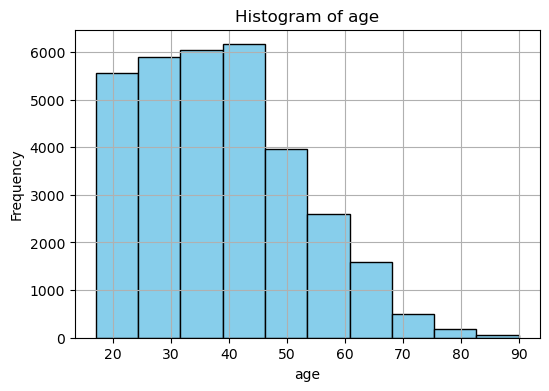

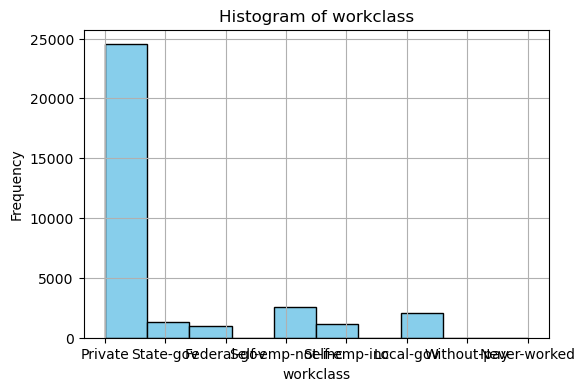

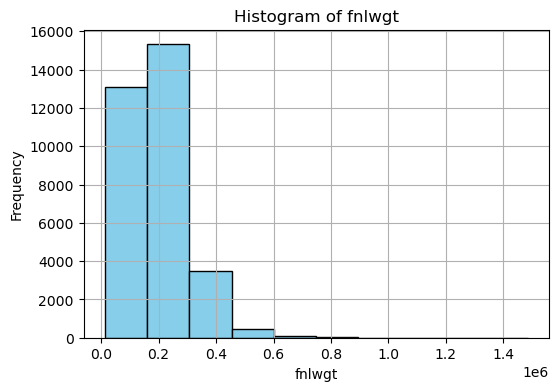

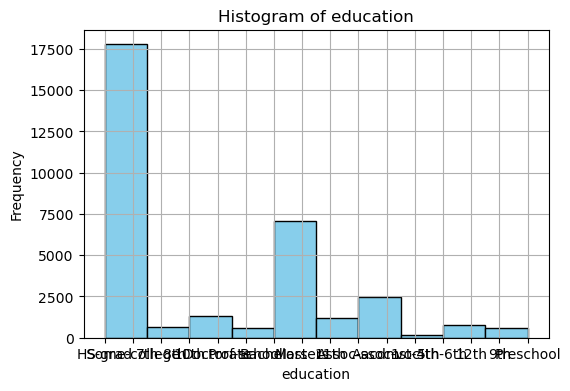

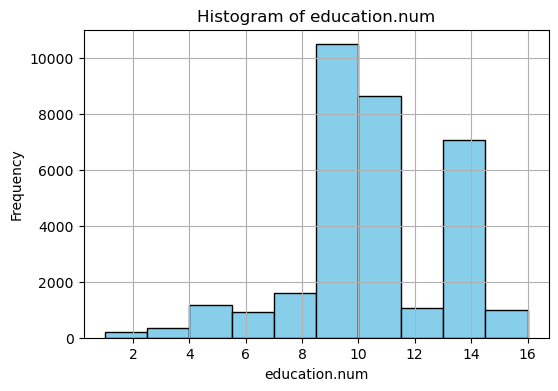

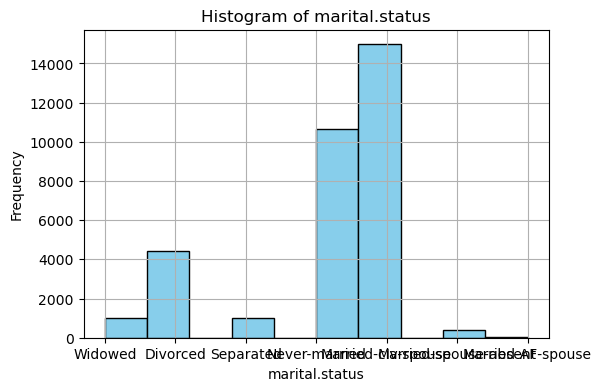

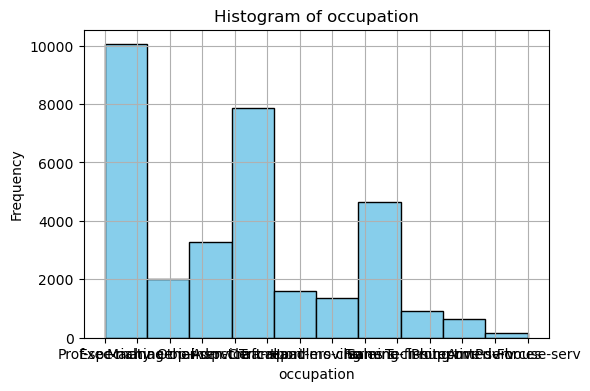

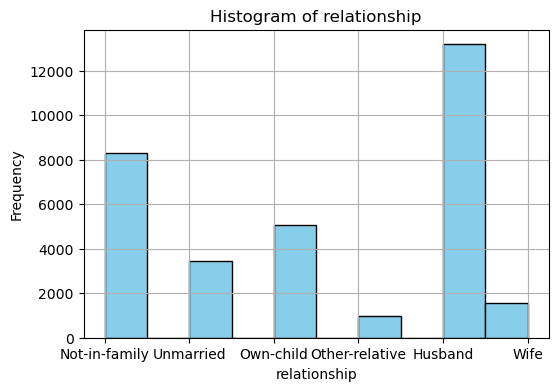

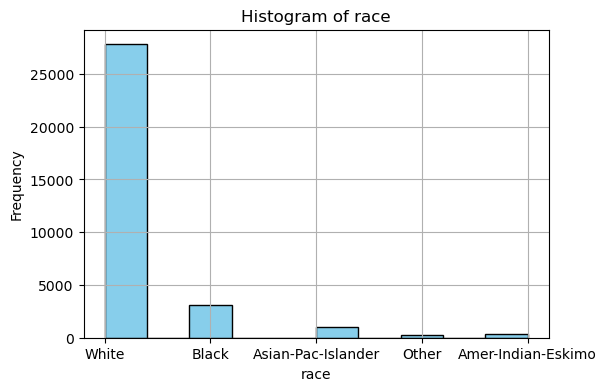

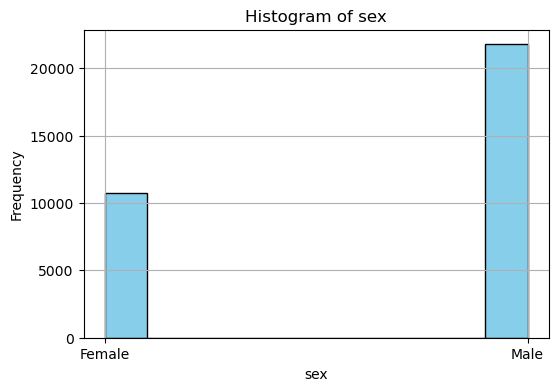

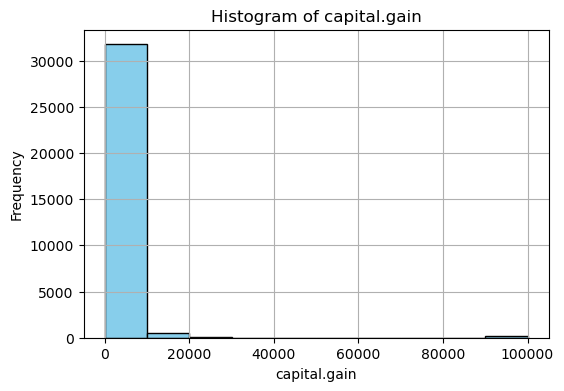

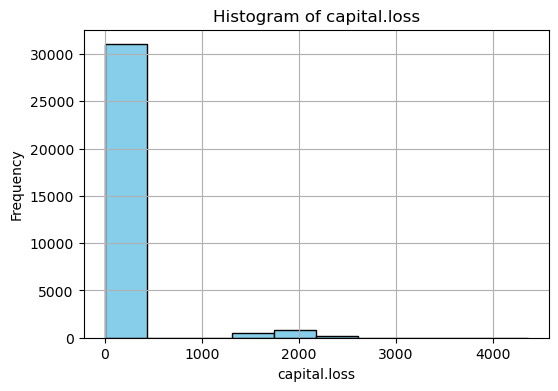

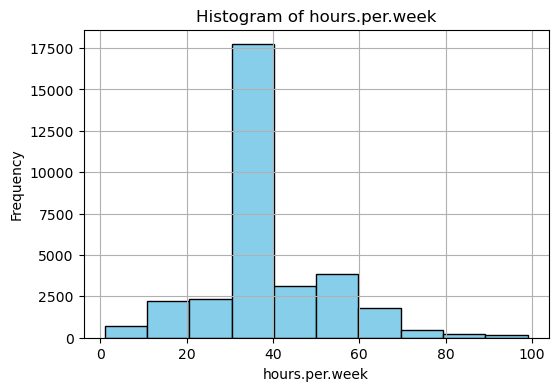

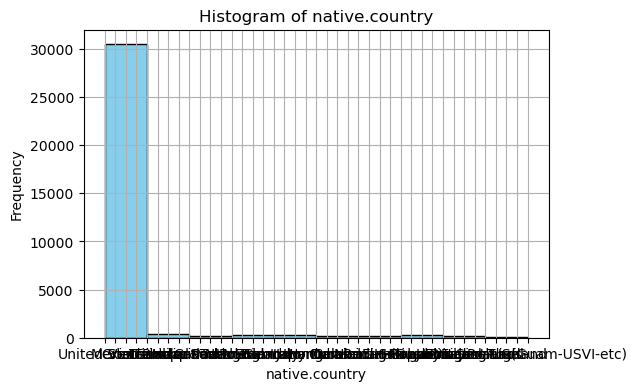

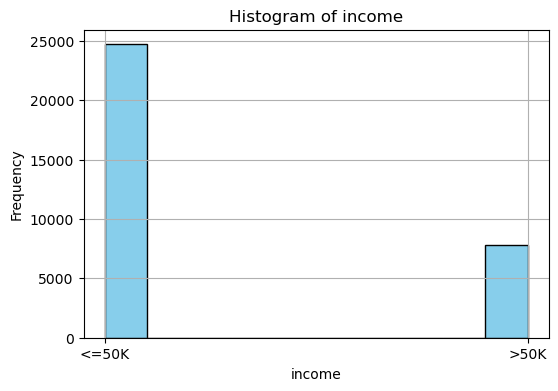

In [10]:
for column in dataset.columns:
    plt.figure(figsize=(6, 4))  # Adjust figsize as needed
    plt.hist(dataset[column], bins=10, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

In [11]:
#Dropping Capital gain and Capital Loss as Majority of values for these variables are 0
columns_to_drop = ['capital.gain', 'capital.loss']
dataset = dataset.drop(columns=columns_to_drop)

In [12]:
# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})



C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


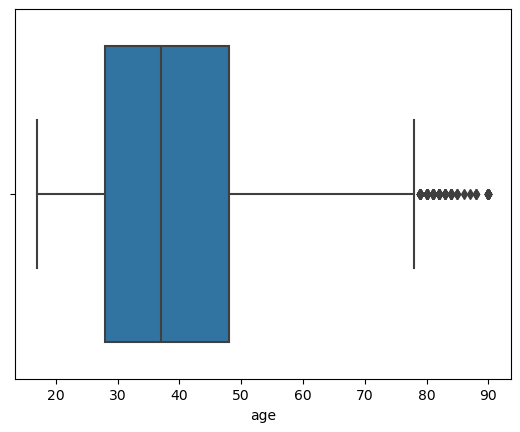

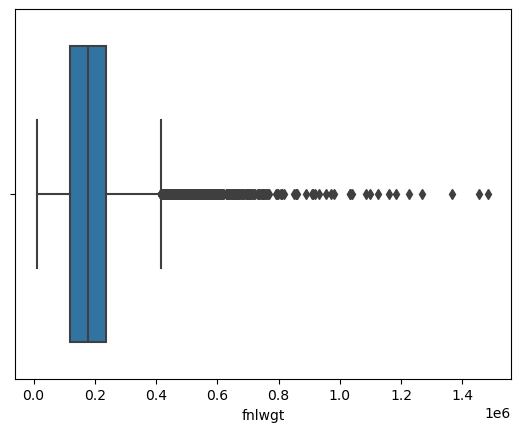

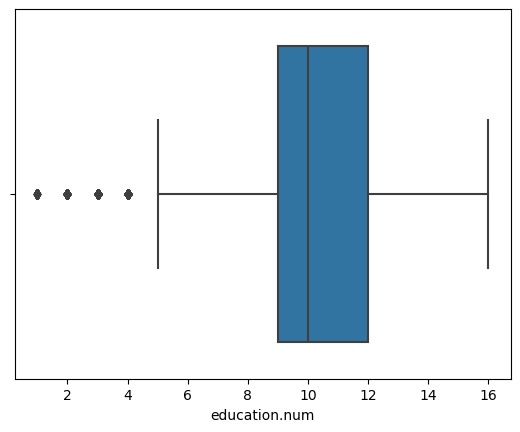

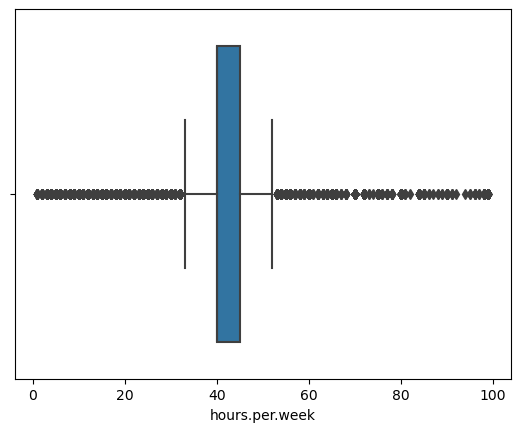

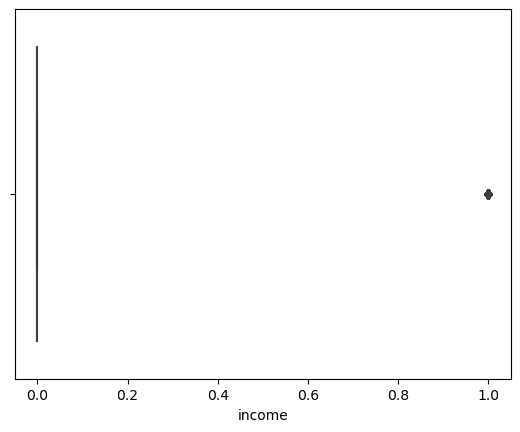

In [13]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for c in dataset[numeric_features]:
    plt.figure()
    sns.boxplot(x = c, data= dataset, orient = "v")

In [14]:
temp_columns = ["age", "fnlwgt", "education.num", "hours.per.week"]
temp = 1.5

for column in temp_columns:
    print("Column:", column)
    
    # Calculate upper and lower quartiles
    Q1 = dataset[column].quantile(0.15)
    Q3 = dataset[column].quantile(0.85)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate upper and lower limits
    upper_limit = Q3 + (temp * IQR)
    lower_limit = Q1 - (temp * IQR)
    
    print("Upper Limit:", upper_limit, "Lower Limit:", lower_limit)
    
    # Identify outliers
    outliers_upper = dataset[dataset[column] > upper_limit]
    outliers_lower = dataset[dataset[column] < lower_limit]
    
    # Calculate number of outliers filtered
    num_outliers_filtered = outliers_upper.shape[0] + outliers_lower.shape[0]
    proportion_outliers_filtered = num_outliers_filtered / dataset.shape[0] * 100
    
    print("Number of outliers above upper limit:", outliers_upper.shape[0])
    print("Number of outliers below lower limit:", outliers_lower.shape[0])
    
    # Replace outliers with upper and lower limits
    dataset.loc[dataset[column] > upper_limit, column] = upper_limit
    dataset.loc[dataset[column] < lower_limit, column] = lower_limit
    
    print("After replacing outliers:")
    print("Number of values above upper limit:", dataset[dataset[column] > upper_limit].shape[0])
    print("Number of values below lower limit:", dataset[dataset[column] < lower_limit].shape[0])
    
    print("Number of outliers filtered:", num_outliers_filtered)
    print("Proportion of outliers filtered (%):", proportion_outliers_filtered)
    print("--------------------------------------")


Column: age
Upper Limit: 99.0 Lower Limit: -21.0
Number of outliers above upper limit: 0
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered: 0
Proportion of outliers filtered (%): 0.0
--------------------------------------
Column: fnlwgt
Upper Limit: 585983.4999999998 Lower Limit: -204852.49999999988
Number of outliers above upper limit: 165
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered: 165
Proportion of outliers filtered (%): 0.507114976795648
--------------------------------------
Column: education.num
Upper Limit: 19.0 Lower Limit: 3.0
Number of outliers above upper limit: 0
Number of outliers below lower limit: 216
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered

C:\Users\User\AppData\Local\Temp\ipykernel_12220\4238453142.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '585983.4999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset[column] > upper_limit, column] = upper_limit


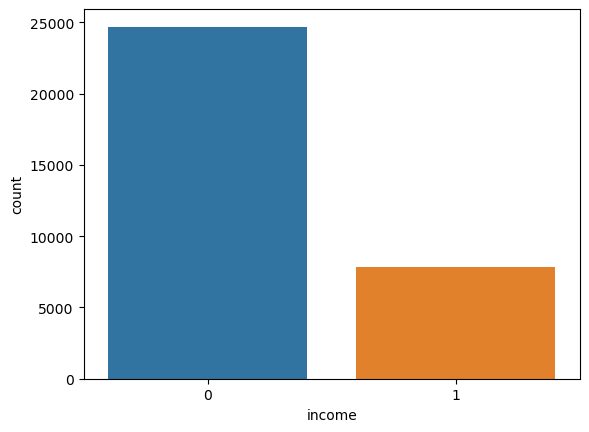

In [15]:

sns.countplot(x='income', data=dataset)
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

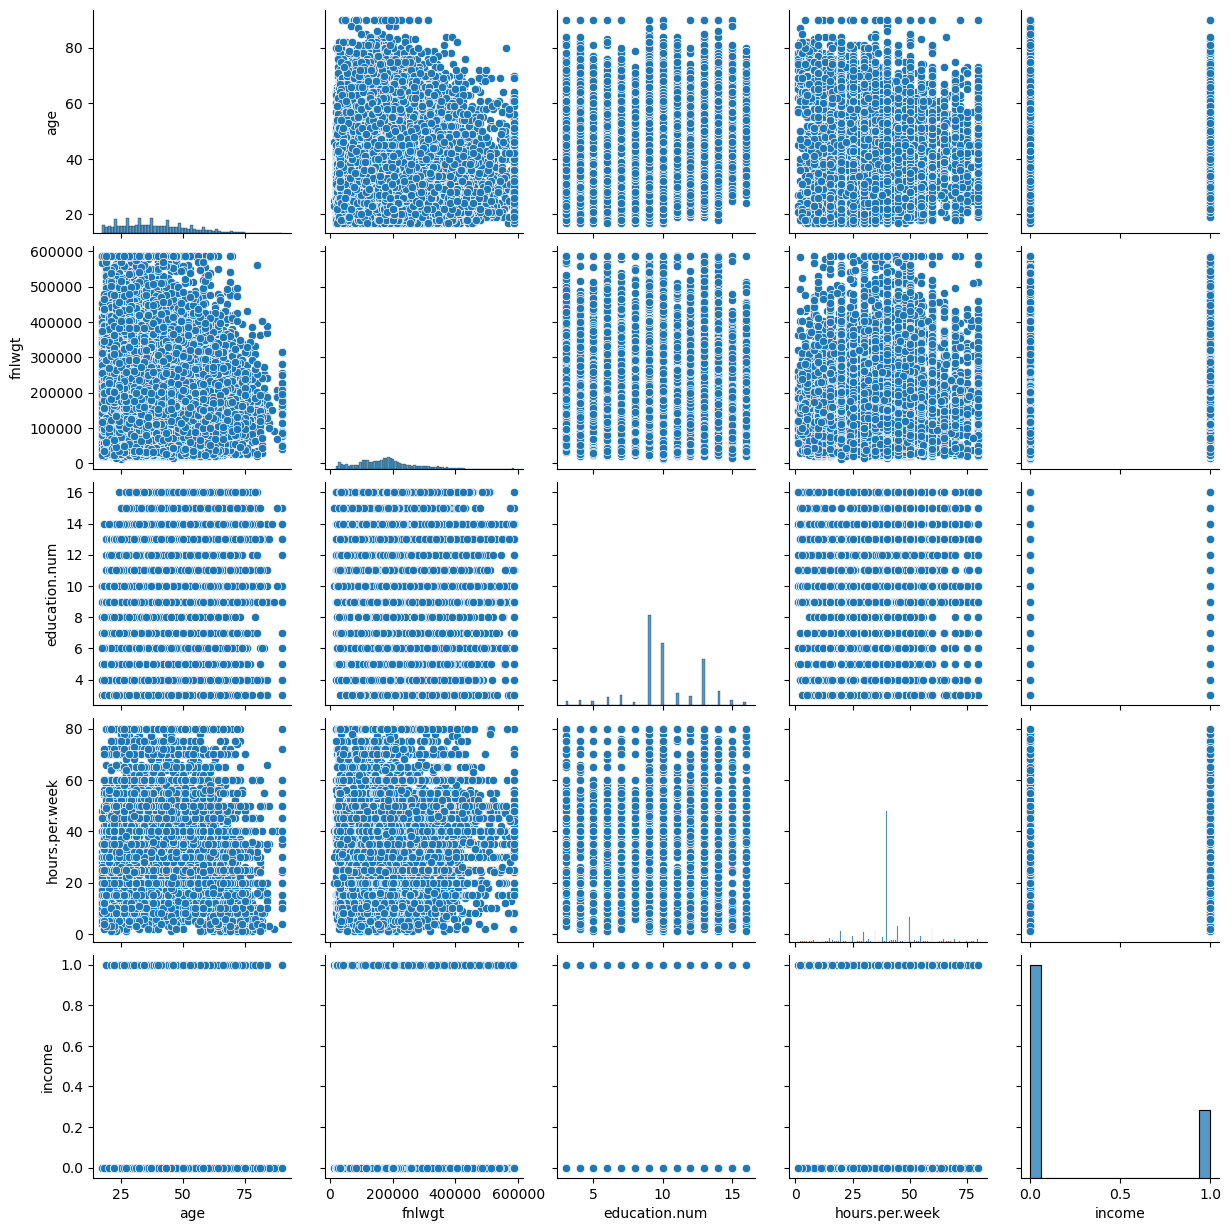

In [16]:
# Example: Pairplot
sns.pairplot(dataset)
plt.show()

In [17]:
# Define categorical columns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [18]:
dataset.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.094446,189082.523389,10.297507,10.089990,2.611427,6.139288,1.446538,3.665827,0.669238,40.360144,36.419184,0.240926
std,13.637984,1.107549,101730.604225,3.870142,2.546799,1.506301,3.973173,1.607064,0.848847,0.470495,12.033932,6.053816,0.427652
min,17.000000,0.000000,12285.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,117827.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,178356.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,236993.000000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,585983.500000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,80.000000,40.000000,1.000000


In [19]:
file_path = "AdultCensusCleaned.csv"

# Save the DataFrame to a CSV file
#dataset.to_csv(file_path, index=False)

In [20]:
from sklearn.model_selection import train_test_split

x = dataset.drop('income',axis=1)
y = dataset['income']

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train, y_train = ros.fit_resample(X_train, y_train)



In [21]:
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(34484, 12) (9762, 12)
(34484,) (9762,)


In [22]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of Random Forest:", accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Testing Accuracy of Random Forest: 0.8095677115345216


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final KNN model with the best hyperparameters
final_knn_model = KNeighborsClassifier(**best_params)
final_knn_model.fit(X_train, y_train)

# Evaluate the final KNN model on the test data
final_accuracy = final_knn_model.score(X_test, y_test)
print("Final Testing Accuracy of KNN:", final_accuracy)



Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Final Testing Accuracy of KNN: 0.7846752714607662


In [29]:

# Load the data and split into train and test sets
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Define the best hyperparameters
best_params = {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

# Create a kNN classifier with the best hyperparameters
knn_model = KNeighborsClassifier(**best_params)

# Fit the model to the scaled training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of kNN with best hyperparameters:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Compute ROC curve and AUC score
y_scores = final_knn_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)

Testing Accuracy of kNN with best hyperparameters: 0.7846752714607662
Confusion Matrix:
[[6373 1083]
 [1019 1287]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7456
           1       0.54      0.56      0.55      2306

    accuracy                           0.78      9762
   macro avg       0.70      0.71      0.70      9762
weighted avg       0.79      0.78      0.79      9762



NameError: name 'roc_curve' is not defined

In [25]:

# Define the best hyperparameters
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Create a Random Forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(**best_params)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of Random Forest with best hyperparameters:", accuracy)

Testing Accuracy of Random Forest with best hyperparameters: 0.8111042819094448
